# 模拟结果可视化

In [1]:
import os, sys
import pandas as pd 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

import scienceplots
plt.style.use(['science', 'nature', 'no-latex', 'notebook'])

this_path = os.path.abspath('.')
if this_path not in sys.path:
    sys.path.append(this_path)

extract_path = os.path.join(this_path, '../../data/extract')

import warnings
warnings.filterwarnings('ignore')


## 1. p+和pi-

In [2]:
ppi_files = os.path.join(extract_path, '*single_p*/*.csv')

ppi_data = []
for ppi_file in glob(ppi_files):
    ppi_data.append(pd.read_csv(ppi_file, index_col=0))

ppi_data = pd.concat(ppi_data)

ppi_data

,particle,material,thickness,p,cos_theta,p_loc,p_loc_err,p_scale,p_scale_err,theta_loc,theta_loc_err,theta_scale,theta_scale_err,efficiency,valid,all,delta_angle_one_sigma
0,single_p+,LD,20,0.325,0.025,-0.026870,0.000130,0.005030,0.000109,-0.000315,0.000360,0.015980,0.000296,0.877405,2691.0,3067.0,0.025735
1,single_p+,LD,20,0.325,0.075,-0.026692,0.000152,0.004901,0.000128,-0.000198,0.000367,0.015917,0.000301,0.870783,2736.0,3142.0,0.025672
2,single_p+,LD,20,0.325,0.125,-0.026716,0.000133,0.004875,0.000111,-0.000133,0.000367,0.016244,0.000303,0.871729,2698.0,3095.0,0.026043
3,single_p+,LD,20,0.325,0.175,-0.027162,0.000158,0.005042,0.000132,-0.000313,0.000461,0.016595,0.000380,0.869110,2656.0,3056.0,0.025680
4,single_p+,LD,20,0.325,0.225,-0.027325,0.000155,0.005171,0.000130,0.000263,0.000321,0.016135,0.000264,0.858685,2704.0,3149.0,0.026096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,single_pi-,LD,10,1.175,0.675,0.000519,0.000154,0.006218,0.000127,0.000126,0.000047,0.002278,0.000038,0.970008,2458.0,2534.0,0.003033
392,single_pi-,LD,10,1.175,0.725,0.000864,0.000172,0.006167,0.000142,-0.000010,0.000042,0.002196,0.000034,0.967273,2394.0,2475.0,0.002985
393,single_pi-,LD,10,1.175,0.775,0.000483,0.000158,0.005975,0.000130,-0.000045,0.000035,0.002226,0.000029,0.959427,2412.0,2514.0,0.003020
394,single_pi-,LD,10,1.175,0.825,0.000903,0.000144,0.005945,0.000118,-0.000020,0.000037,0.002051,0.000030,0.956956,2490.0,2602.0,0.003038


In [3]:
ppi_data['efficiency_err'] = (ppi_data.efficiency * (1-ppi_data.efficiency) / ppi_data['all']) ** 0.5 

In [4]:
ppi_csi_data = ppi_data[ppi_data.material=='CsI']
keys = ['p_scale', 'theta_scale', 'efficiency', 'delta_angle_one_sigma']
titles = ['p_resolution', 'theta_resolution', 'efficiency', 'delta_angle_one_sigma']

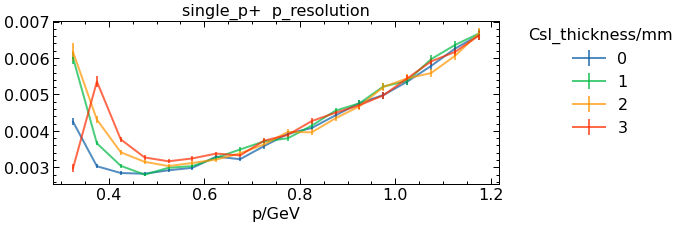

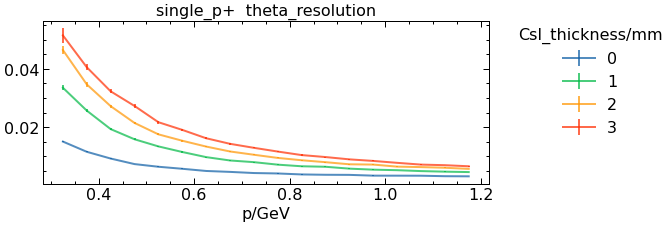

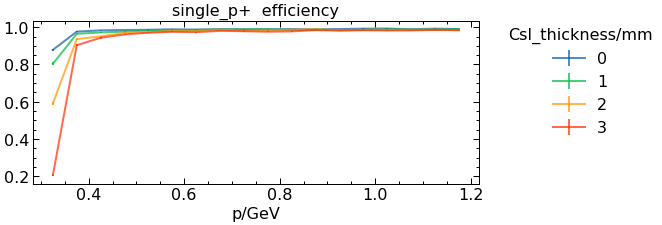

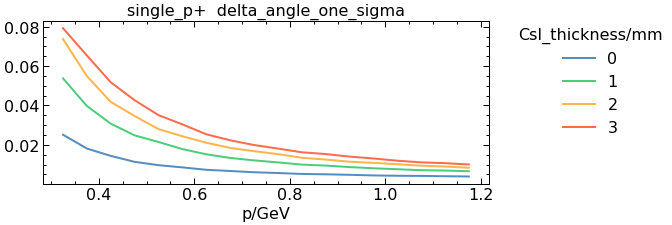

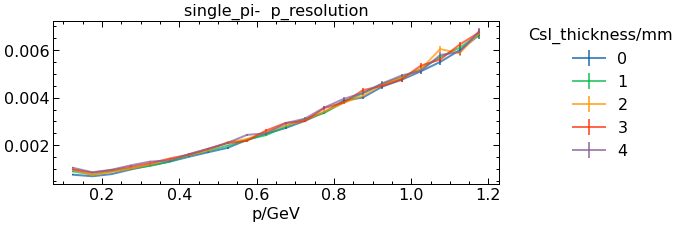

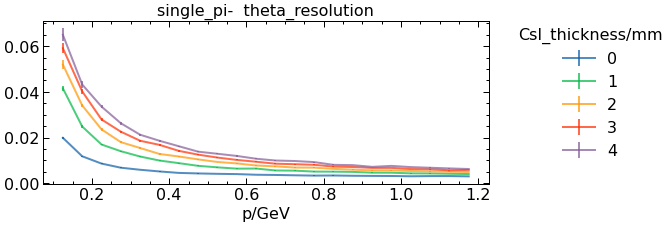

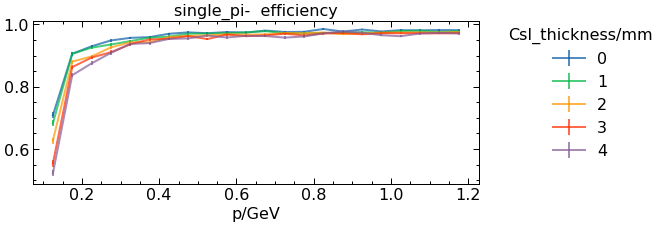

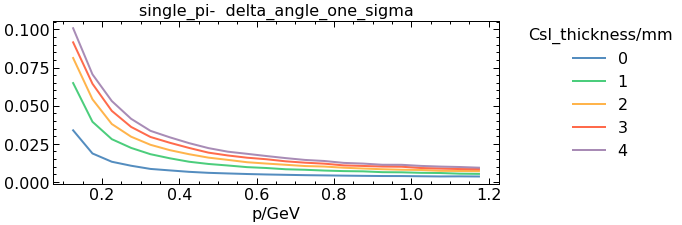

In [5]:
# 动量依赖
ppi_csi_data_fixed_theta = ppi_csi_data[ppi_csi_data.cos_theta==0.375]

for particle in ['single_p+', 'single_pi-']:
    ppi_csi_data_fixed_theta_particle = ppi_csi_data_fixed_theta[
        (ppi_csi_data_fixed_theta.particle==particle)
    ]
    for key,title in zip(keys, titles) :
        # print(particle, key)
        key_err = key + '_err'
        tmp = pd.DataFrame(index=np.sort(ppi_csi_data_fixed_theta_particle.p.unique()))
        tmp_err = tmp.copy()
        tmp.index.name = 'p/GeV'
        for thickness in np.sort(ppi_csi_data_fixed_theta_particle.thickness.unique()):
            tmp_thickness = ppi_csi_data_fixed_theta_particle[
                (ppi_csi_data_fixed_theta_particle.thickness==thickness)
            ].set_index('p').reindex(tmp.index)
            tmp[thickness] = tmp_thickness[key]
            if key_err in ppi_csi_data_fixed_theta_particle.columns:
                tmp_err[thickness] = tmp_thickness[key_err]
            
        tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format(particle, title), figsize=(8,3), yerr=tmp_err)
        plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
        plt.show()
            

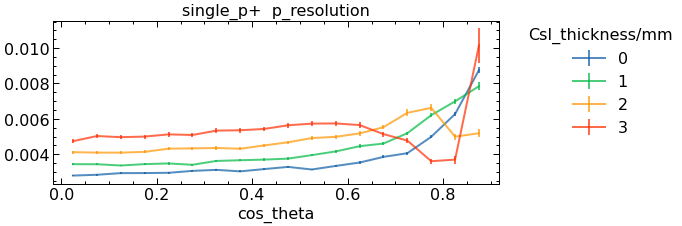

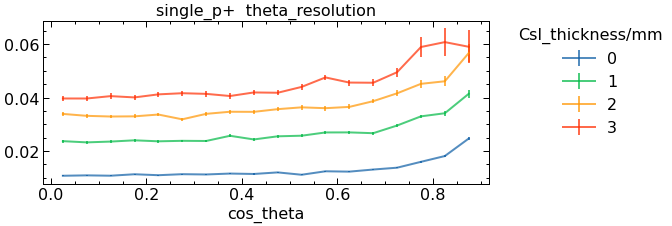

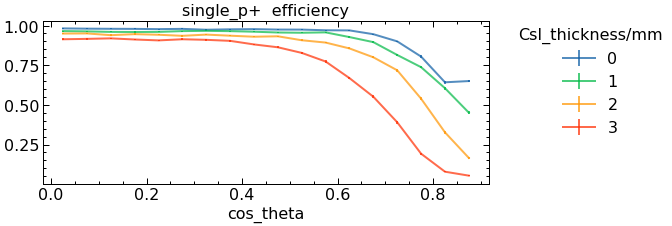

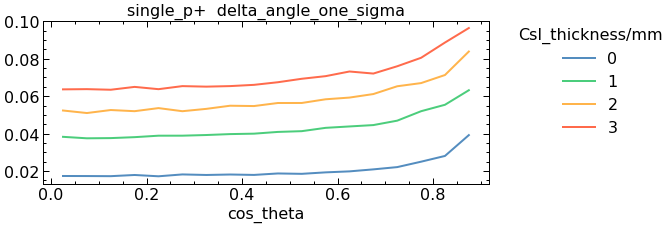

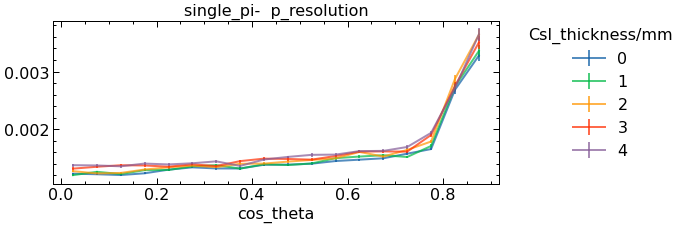

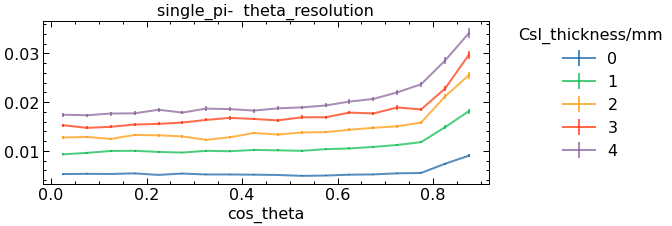

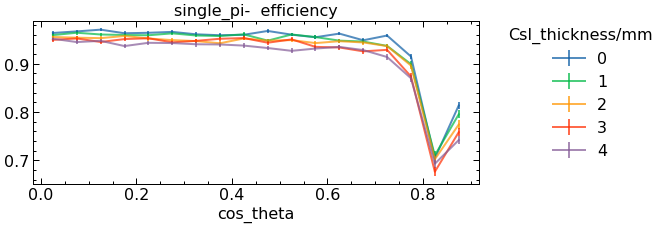

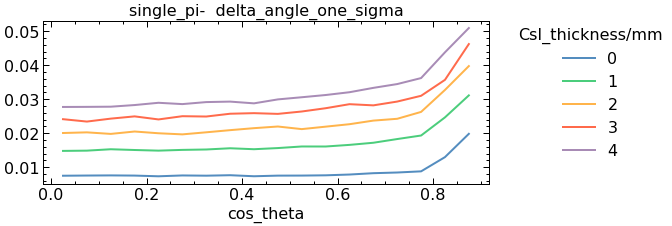

In [6]:
# theta依赖
ppi_csi_data_fixed_p = ppi_csi_data[ppi_csi_data.p==0.375]

for particle in ['single_p+', 'single_pi-']:
    ppi_csi_data_fixed_p_particle = ppi_csi_data_fixed_p[
        (ppi_csi_data_fixed_p.particle==particle) & 
        (ppi_csi_data_fixed_p.particle==particle)
    ]
    for key,title in zip(keys, titles):
        # print(particle, key)
        key_err = key + '_err'
        tmp = pd.DataFrame(index=np.sort(ppi_csi_data_fixed_p_particle.cos_theta.unique()))
        tmp_err = tmp.copy()
        tmp.index.name = 'cos_theta'
        for thickness in np.sort(ppi_csi_data_fixed_p_particle.thickness.unique()):
            tmp_thickness = ppi_csi_data_fixed_p_particle[
                (ppi_csi_data_fixed_p_particle.thickness==thickness)
            ].set_index('cos_theta').reindex(tmp.index)
            tmp[thickness] = tmp_thickness[key]
            if key_err in ppi_csi_data_fixed_p_particle.columns:
                tmp_err[thickness] = tmp_thickness[key_err]

        tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format(particle, title), figsize=(8,3), yerr=tmp_err)
        plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
        plt.show()

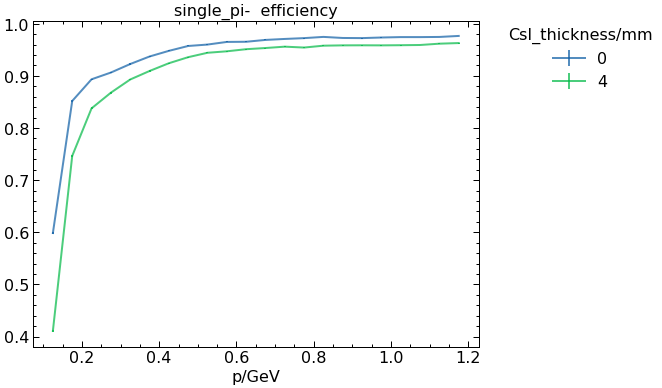

In [7]:
# 动量依赖
ppi_csi_data_pp = ppi_csi_data[ppi_csi_data.particle=='single_pi-']
tmp = pd.DataFrame(index=np.sort(ppi_csi_data_pp.p.unique()))
tmp_err = tmp.copy()
tmp.index.name = 'p/GeV'
tmp.columns.name = 'CsI_thickness'

for thickness in np.sort(ppi_csi_data_pp.thickness.unique()):
    df = ppi_csi_data_pp[
        (ppi_csi_data_pp.thickness==thickness)
    ].groupby('p').sum()
    tmp[thickness] = df.valid / df['all']
    tmp_err[thickness] = (tmp[thickness] * (1-tmp[thickness]) / df['all']) ** 0.5

tmp[[0,4]].plot(alpha=0.7, title='{}  {}'.format('single_pi-', 'efficiency'), figsize=(8,6), yerr=tmp_err)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
plt.show()

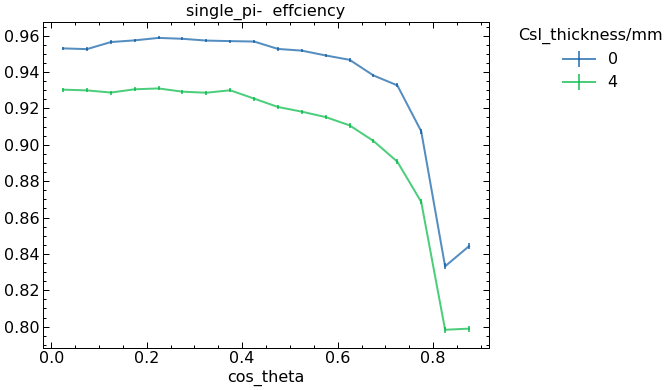

In [8]:
# theta依赖
ppi_csi_data_pp = ppi_csi_data[ppi_csi_data.particle=='single_pi-']
tmp = pd.DataFrame(index=np.sort(ppi_csi_data_pp.cos_theta.unique()))
tmp_err = tmp.copy()
tmp.index.name = 'cos_theta'
tmp.columns.name = 'CsI_thickness'
for thickness in np.sort(ppi_csi_data_pp.thickness.unique()):
    df = ppi_csi_data_pp[
        (ppi_csi_data_pp.thickness==thickness)
    ].groupby('cos_theta').sum()
    tmp[thickness] = df.valid / df['all']
    tmp_err[thickness] = (tmp[thickness] * (1-tmp[thickness]) / df['all']) ** 0.5

tmp[[0,4]].plot(alpha=0.7, style='o-', title='{}  {}'.format('single_pi-', 'effciency'), figsize=(8,6), yerr=tmp_err)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
plt.show()

[2 0 3 4 1]


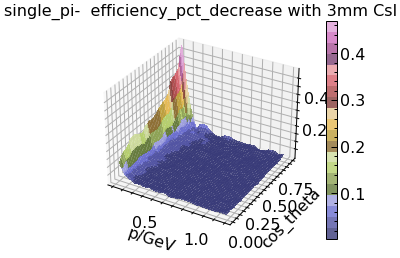

In [9]:
from scipy.interpolate import griddata

particle = 'single_pi-'

ppi_csi_data_pp = ppi_csi_data[ppi_csi_data.particle==particle]

tmp = ppi_csi_data_pp[ppi_csi_data_pp.thickness==0].sort_values(['p', 'cos_theta'])
tmp2 = ppi_csi_data_pp[ppi_csi_data_pp.thickness==3].sort_values(['p', 'cos_theta'])
tmp['efficiency_pct_change'] = 1 - tmp2.efficiency / tmp.efficiency

# tmp = tmp[tmp.efficiency_pct_change>0]

print(ppi_csi_data_pp.thickness.unique())


xi=np.linspace(min(tmp.p),max(tmp.p))
yi=np.linspace(min(tmp.cos_theta),max(tmp.cos_theta))
xi,yi=np.meshgrid(xi,yi)
zi=griddata(tmp[['p', 'cos_theta']],tmp.efficiency_pct_change,(xi,yi))

fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(xi, yi, zi,cmap='tab20b',linewidth=0,antialiased=False, alpha=0.8)
fig.colorbar(surf)
ax.set_title('{}  {}'.format(particle, 'efficiency_pct_decrease with 3mm CsI'))

ax.set_xlabel('p/GeV')
ax.set_ylabel('cos_theta')
# ax.set_zlabel('hit_CsI_ratio')

plt.show()

In [10]:
tmp = tmp[tmp.p==0.13][['p', 'cos_theta',  'efficiency_pct_change']]
tmp1 = ppi_csi_data_pp[(ppi_csi_data_pp.p==0.13) & (ppi_csi_data_pp.thickness==0)][['valid', 'all', 'efficiency']]
tmp1.columns = [i+'_0' for i in tmp1.columns]

tmp2 = ppi_csi_data_pp[(ppi_csi_data_pp.p==0.13) & (ppi_csi_data_pp.thickness==10)][['valid', 'all', 'efficiency']]
tmp2.columns = [i+'_10' for i in tmp2.columns]

pd.concat([tmp,tmp1,tmp2], axis=1)


,p,cos_theta,efficiency_pct_change,valid_0,all_0,efficiency_0,valid_10,all_10,efficiency_10


## 2. n0

In [11]:
n0_files = os.path.join(extract_path, '*n0*/*.csv')

n0_data = []
for n0_file in glob(n0_files):
    n0_data.append(pd.read_csv(n0_file, index_col=0))

n0_data = pd.concat(n0_data)

n0_data

,particle,material,thickness,p,cos_theta,annihilate_ratio,annihilate_num,scatter_ratio,scatter_num,all
0,single_n0,LD,20,0.125,0.025,0.099661,235.0,0.023749,56.0,2358.0
1,single_n0,LD,20,0.125,0.075,0.097561,220.0,0.023060,52.0,2255.0
2,single_n0,LD,20,0.125,0.125,0.100581,225.0,0.021010,47.0,2237.0
3,single_n0,LD,20,0.125,0.175,0.096558,216.0,0.019669,44.0,2237.0
4,single_n0,LD,20,0.125,0.225,0.101644,235.0,0.021194,49.0,2312.0
...,...,...,...,...,...,...,...,...,...,...
391,single_n0,LD,10,1.175,0.675,0.010114,24.0,0.011378,27.0,2373.0
392,single_n0,LD,10,1.175,0.725,0.011842,27.0,0.011404,26.0,2280.0
393,single_n0,LD,10,1.175,0.775,0.017048,38.0,0.010767,24.0,2229.0
394,single_n0,LD,10,1.175,0.825,0.006536,15.0,0.013943,32.0,2295.0


In [12]:
n0_data['annihilate_ratio_err'] = (n0_data.annihilate_num * (1-n0_data.annihilate_num) / n0_data['all']) ** 0.5 

n0_data['scatter_ratio_err'] = (n0_data.scatter_num * (1-n0_data.annihilate_num) / n0_data['all']) ** 0.5 

In [13]:
n0_csi_data = n0_data[n0_data.material=='CsI']

CsI_thickness
0    0.000000
1    0.016453
2    0.031841
3    0.045871
4    0.059703
dtype: float64


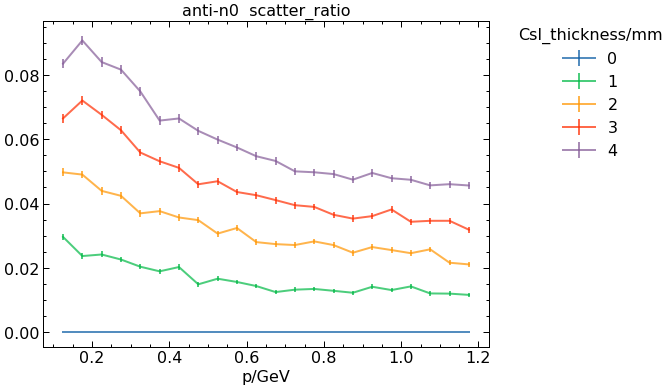

CsI_thickness
0    0.000000
1    0.012113
2    0.024179
3    0.035919
4    0.047620
dtype: float64


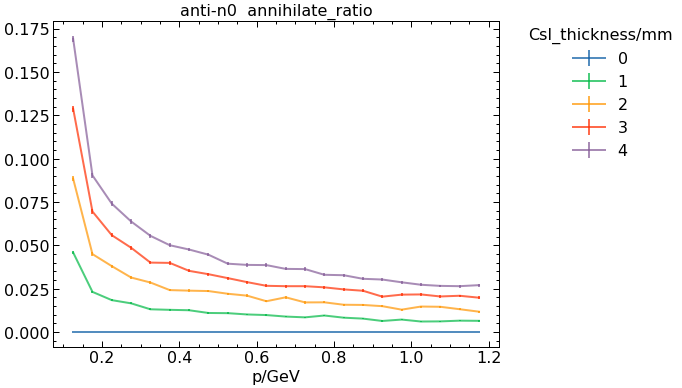

In [14]:
# 动量依赖
keys = ['scatter_ratio', 'annihilate_ratio']
nums = ['scatter_num', 'annihilate_num']
for key, num in zip(keys, nums):
    tmp = pd.DataFrame(index=np.sort(n0_csi_data.p.unique()))
    tmp_err = tmp.copy()
    tmp.index.name = 'p/GeV'
    tmp.columns.name = 'CsI_thickness'
    for thickness in np.sort(n0_csi_data.thickness.unique()):
        df = n0_csi_data[
            (n0_csi_data.thickness==thickness)
        ].groupby('p').sum()
        tmp[thickness] = df[num] / df['all']
        tmp_err[thickness] = (tmp[thickness] * (1-tmp[thickness]) / df['all']) ** 0.5
    # print(tmp.iloc[:,0])
    tmp = tmp.apply(lambda x: x-tmp.iloc[:,0], axis=0)
    tmp_err.iloc[:,0] = 0

    print(tmp.mean())

    tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format('anti-n0', key), figsize=(8,6), yerr=tmp_err)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
    plt.show()

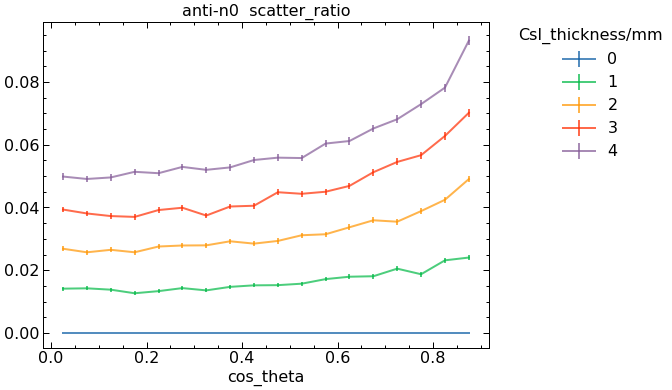

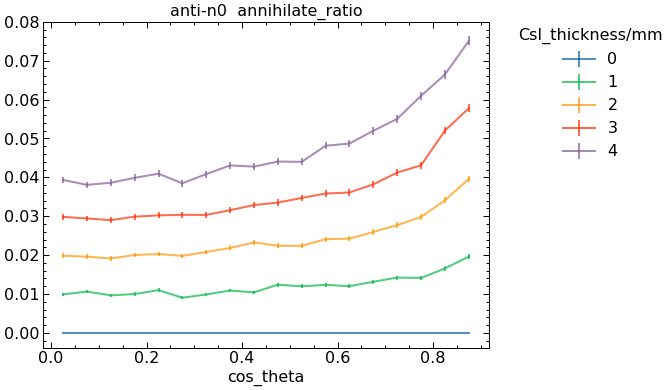

In [15]:
# theta依赖

for key, num in zip(keys, nums):
    tmp = pd.DataFrame(index=np.sort(n0_csi_data.cos_theta.unique()))
    tmp_err = tmp.copy()
    tmp.index.name = 'cos_theta'
    tmp.columns.name = 'CsI_thickness'
    for thickness in np.sort(n0_csi_data.thickness.unique()):
        df = n0_csi_data[
            (n0_csi_data.thickness==thickness)
        ].groupby('cos_theta').sum()
        tmp[thickness] = df[num] / df['all']
        tmp_err[thickness] = (tmp[thickness] * (1-tmp[thickness]) / df['all']) ** 0.5

    tmp = tmp.apply(lambda x: x-tmp.iloc[:,0], axis=0)
    tmp_err.iloc[:,0] = 0

    tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format('anti-n0', key), figsize=(8,6), yerr=tmp_err)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
    plt.show()

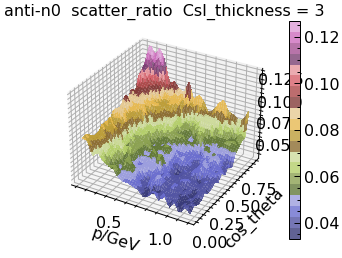

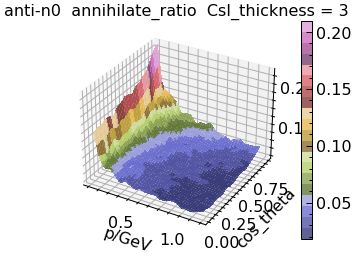

In [16]:
from scipy.interpolate import griddata

tmp = n0_csi_data[n0_csi_data.thickness==4]

tmp.scatter_ratio = tmp.apply(lambda x: x.scatter_ratio - n0_csi_data.loc[(n0_csi_data.p==x.p) & (n0_csi_data.cos_theta==x.cos_theta) & (n0_csi_data.thickness==0)].scatter_ratio.values[0], axis=1)

for key in ['scatter_ratio', 'annihilate_ratio']:

    xi=np.linspace(min(tmp.p),max(tmp.p))
    yi=np.linspace(min(tmp.cos_theta),max(tmp.cos_theta))
    xi,yi=np.meshgrid(xi,yi)
    zi=griddata(tmp[['p', 'cos_theta']],tmp[key],(xi,yi))

    fig=plt.figure()
    ax=fig.gca(projection='3d')
    surf=ax.plot_surface(xi, yi, zi,cmap='tab20b',linewidth=0,antialiased=False, alpha=0.8)
    fig.colorbar(surf)
    ax.set_title('{}  {}  CsI_thickness = 3'.format('anti-n0', key))

    ax.set_xlabel('p/GeV')
    ax.set_ylabel('cos_theta')
    # ax.set_zlabel('hit_CsI_ratio')

    plt.show()

# 3. p+pi-nbar

In [17]:
ppinbar_files = os.path.join(extract_path, 'p+pi-nbar/*.csv')

ppinbar_data = []
for ppinbar_file in glob(ppinbar_files):
    ppinbar_data.append(pd.read_csv(ppinbar_file, index_col=0))

ppinbar_data = pd.concat(ppinbar_data)

ppinbar_data

,particle,material,thickness,p,cos_theta,p_loc,p_loc_err,p_scale,p_scale_err,theta_loc,theta_loc_err,theta_scale,theta_scale_err,efficiency,valid,all,delta_angle_one_sigma
0,p+pi-nbar,CsI,3,0.15,0.05,0.008911,0.001828,0.028046,0.001494,0.005639,0.004655,0.078146,0.003802,0.797500,319.0,400.0,0.207327
1,p+pi-nbar,CsI,3,0.15,0.15,0.002460,0.002003,0.030038,0.001636,0.008219,0.003843,0.076597,0.003138,0.814815,330.0,405.0,0.223610
2,p+pi-nbar,CsI,3,0.15,0.25,0.006299,0.002261,0.029778,0.001856,0.024088,0.003615,0.067768,0.002952,0.829843,317.0,382.0,0.220433
3,p+pi-nbar,CsI,3,0.15,0.35,0.004740,0.002212,0.030276,0.001811,-0.001391,0.005948,0.088368,0.004864,0.845953,324.0,383.0,0.220470
4,p+pi-nbar,CsI,3,0.15,0.45,0.004270,0.001899,0.027380,0.001562,0.013950,0.007663,0.104269,0.006288,0.801008,318.0,397.0,0.222800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,p+pi-nbar,CsI,2,1.15,0.45,0.000882,0.001684,0.028782,0.001424,0.000632,0.000350,0.014641,0.000287,0.805108,2648.0,3289.0,0.029937
95,p+pi-nbar,CsI,2,1.15,0.55,0.000516,0.001703,0.026791,0.001443,0.000515,0.000413,0.016299,0.000339,0.795119,2639.0,3319.0,0.031016
96,p+pi-nbar,CsI,2,1.15,0.65,0.000794,0.001287,0.024085,0.001091,0.000913,0.000548,0.018631,0.000452,0.770081,2368.0,3075.0,0.032748
97,p+pi-nbar,CsI,2,1.15,0.75,0.001251,0.000878,0.021029,0.000741,0.001346,0.000723,0.021419,0.000593,0.712084,2310.0,3244.0,0.033488


In [18]:
ppinbar_data['efficiency_err'] = (ppinbar_data.efficiency * (1-ppinbar_data.efficiency) / ppinbar_data['all']) ** 0.5 

ppinbar_csi_data = ppinbar_data[ppinbar_data.material=='CsI']
keys = ['p_scale', 'theta_scale', 'efficiency', 'delta_angle_one_sigma']
titles = ['recoil_p_resolution', 'recoil_theta_resolution', 'efficiency', 'recoil_delta_angle_one_sigma']

In [28]:
ppinbar_data['efficiency_err']

0     0.020093
1     0.019302
2     0.019226
3     0.018446
4     0.020037
        ...   
94    0.006907
95    0.007006
96    0.007588
97    0.007950
98    0.008712
Name: efficiency_err, Length: 1089, dtype: float64

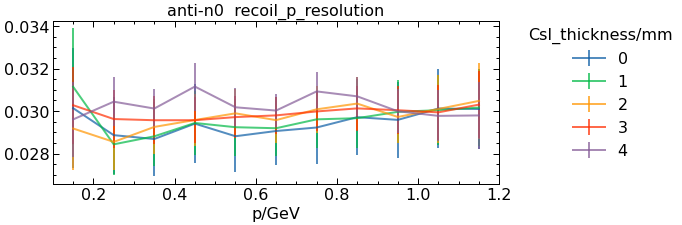

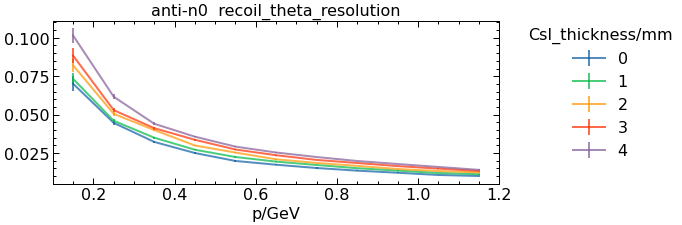

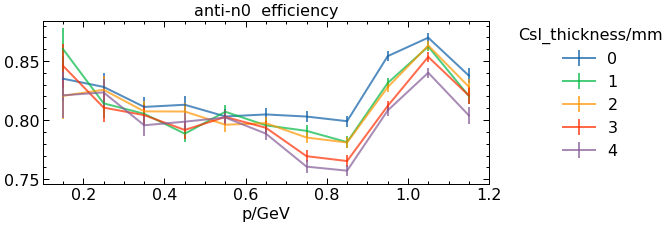

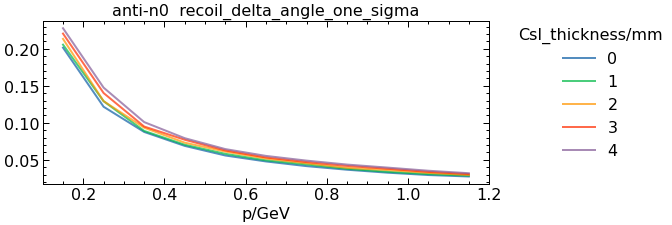

In [31]:
# 动量依赖
ppinbar_csi_data_fixed_theta = ppinbar_csi_data[ppinbar_csi_data.cos_theta==0.35]

for key,title in zip(keys, titles) :
    # print(particle, key)
    key_err = key + '_err'
    tmp = pd.DataFrame(index=np.sort(ppinbar_csi_data_fixed_theta.p.unique()))
    tmp_err = tmp.copy()
    tmp.index.name = 'p/GeV'
    for thickness in np.sort(ppinbar_csi_data_fixed_theta.thickness.unique()):
        tmp_thickness = ppinbar_csi_data_fixed_theta[
            (ppinbar_csi_data_fixed_theta.thickness==thickness)
        ].set_index('p').reindex(tmp.index)
        tmp[thickness] = tmp_thickness[key]
        if key_err in ppinbar_csi_data_fixed_theta.columns:
            tmp_err[thickness] = tmp_thickness[key_err]
        
    tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format('anti-n0', title), figsize=(8,3), yerr=tmp_err)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
    plt.show()

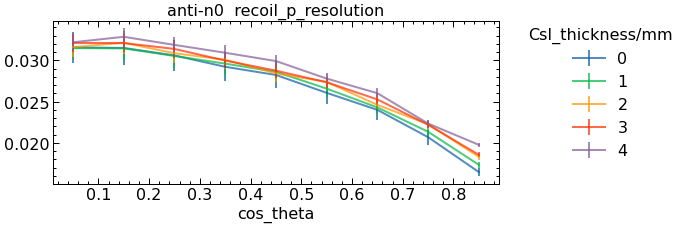

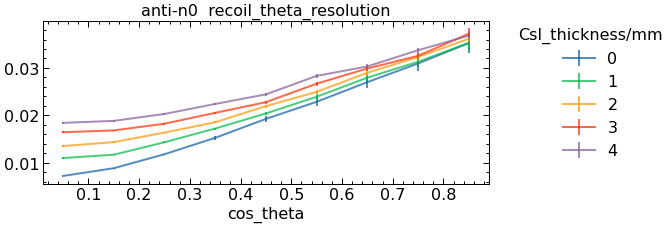

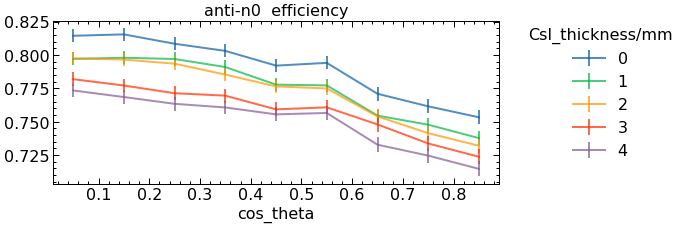

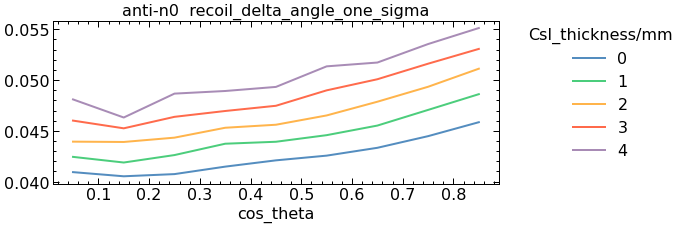

In [34]:
# theta依赖
ppinbar_csi_data_fixed_p = ppinbar_csi_data[ppinbar_csi_data.p==0.75]

for key,title in zip(keys, titles):
    # print(particle, key)
    key_err = key + '_err'
    tmp = pd.DataFrame(index=np.sort(ppinbar_csi_data_fixed_p.cos_theta.unique()))
    tmp_err = tmp.copy()
    tmp.index.name = 'cos_theta'
    for thickness in np.sort(ppinbar_csi_data_fixed_p.thickness.unique()):
        tmp_thickness = ppinbar_csi_data_fixed_p[
            (ppinbar_csi_data_fixed_p.thickness==thickness)
        ].set_index('cos_theta').reindex(tmp.index)
        tmp[thickness] = tmp_thickness[key]
        if key_err in ppinbar_csi_data_fixed_p.columns:
            tmp_err[thickness] = tmp_thickness[key_err]

    tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format('anti-n0', title), figsize=(8,3), yerr=tmp_err)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
    plt.show()

In [21]:
ppinbar_csi_data

,particle,material,thickness,p,cos_theta,p_loc,p_loc_err,p_scale,p_scale_err,theta_loc,theta_loc_err,theta_scale,theta_scale_err,efficiency,valid,all,delta_angle_one_sigma,efficiency_err
0,p+pi-nbar,CsI,3,0.15,0.05,0.008911,0.001828,0.028046,0.001494,0.005639,0.004655,0.078146,0.003802,0.797500,319.0,400.0,0.207327,0.020093
1,p+pi-nbar,CsI,3,0.15,0.15,0.002460,0.002003,0.030038,0.001636,0.008219,0.003843,0.076597,0.003138,0.814815,330.0,405.0,0.223610,0.019302
2,p+pi-nbar,CsI,3,0.15,0.25,0.006299,0.002261,0.029778,0.001856,0.024088,0.003615,0.067768,0.002952,0.829843,317.0,382.0,0.220433,0.019226
3,p+pi-nbar,CsI,3,0.15,0.35,0.004740,0.002212,0.030276,0.001811,-0.001391,0.005948,0.088368,0.004864,0.845953,324.0,383.0,0.220470,0.018446
4,p+pi-nbar,CsI,3,0.15,0.45,0.004270,0.001899,0.027380,0.001562,0.013950,0.007663,0.104269,0.006288,0.801008,318.0,397.0,0.222800,0.020037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,p+pi-nbar,CsI,2,1.15,0.45,0.000882,0.001684,0.028782,0.001424,0.000632,0.000350,0.014641,0.000287,0.805108,2648.0,3289.0,0.029937,0.006907
95,p+pi-nbar,CsI,2,1.15,0.55,0.000516,0.001703,0.026791,0.001443,0.000515,0.000413,0.016299,0.000339,0.795119,2639.0,3319.0,0.031016,0.007006
96,p+pi-nbar,CsI,2,1.15,0.65,0.000794,0.001287,0.024085,0.001091,0.000913,0.000548,0.018631,0.000452,0.770081,2368.0,3075.0,0.032748,0.007588
97,p+pi-nbar,CsI,2,1.15,0.75,0.001251,0.000878,0.021029,0.000741,0.001346,0.000723,0.021419,0.000593,0.712084,2310.0,3244.0,0.033488,0.007950


[3 0 1 4 2]


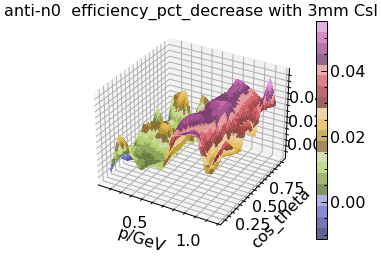

In [22]:
from scipy.interpolate import griddata

particle = 'anti-n0'

tmp = ppinbar_csi_data[ppinbar_csi_data.thickness==0].sort_values(['p', 'cos_theta'])
tmp2 = ppinbar_csi_data[ppinbar_csi_data.thickness==3].sort_values(['p', 'cos_theta'])
tmp['efficiency_pct_change'] = 1 - tmp2.efficiency / tmp.efficiency

# tmp = tmp[tmp.efficiency_pct_change>0]

print(ppinbar_csi_data.thickness.unique())


xi=np.linspace(min(tmp.p),max(tmp.p))
yi=np.linspace(min(tmp.cos_theta),max(tmp.cos_theta))
xi,yi=np.meshgrid(xi,yi)
zi=griddata(tmp[['p', 'cos_theta']],tmp.efficiency_pct_change,(xi,yi))

fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(xi, yi, zi,cmap='tab20b',linewidth=0,antialiased=False, alpha=0.8)
fig.colorbar(surf)
ax.set_title('{}  {}'.format(particle, 'efficiency_pct_decrease with 3mm CsI'))

ax.set_xlabel('p/GeV')
ax.set_ylabel('cos_theta')
# ax.set_zlabel('hit_CsI_ratio')

plt.show()